# Acknowledgement

Các tình huống, định danh và dữ liệu dưới đây điều được giả định theo kinh nghiệm của người viết không mục đích chỉ định bất cứ cá nhân hay tổ chức nào. Bài toán và dữ liệu được đảm bảo tạo ra để phục vụ mục đích học tập. Không có bất kỳ sao chép dữ liệu trái phép nào.

# Bản quyền
Vui lòng không chia sẻ hay sao chép bất kỳ thông tin, nội dung hay dữ liệu của bài viết này và dùng cho mục đích thương mại khi chưa có sự đồng ý của tác giả. Tất cả dữ liệu, nội dung, thông tin chỉ được phép mục đích học tập và được sự đồng ý từ tác giả. Vui lòng liên hệ hthquan28@gmail.com nếu có nhu cầu hợp tác. Nếu bạn thấy có sự sao chép trái phép dữ liệu này ở nơi khác, vui lòng cho mình thông tin để đảm bảo quyền lợi của bạn và người mua khóa học này.

Đọc thêm: [Acknowledgement](https://docs.google.com/document/d/1gRZRnfyw3PPxLs4T7NxdiF7_Gi887IiCkygBMNUhG40/edit?usp=sharing)

# Recap

Tới đây thì bạn đã thuần thục được các kỹ năng phân tích cơ bản và hiểu được business model khi gặp bất kỳ 1 bảng dữ liệu nào

Cũng như bạn đã hiểu bạn cần phải làm gì khi nhận được 1 bảng label table data. 

Do đó bạn có thể hình dung rằng việc data preparation thường tốn nhiều thời gian hơn là modeling. 

# A. Overview Data

**Tình huống doanh nghiệp**

## Label

## Features

# B. Let Solve Problem

Import thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [2]:
# sklearn
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


## 1. Explore Data Analysis

In [3]:
label_df = pd.read_csv('./data/hw3_credit_risk.csv', index_col=0)
label_df

,customer_id,credit_label,credit_rating,credit_score,approval_status,reject_reason,credit_limit,application_date,application_reason,disbursement_date
0,11251,Bad,Kém,377,Từ chối,Điểm tín dụng thấp,NaN,2022-04-13,Mua đồ trang sức,NaN
1,10248,Good,Tốt,713,Chấp nhận,NaN,50000000.0,2022-11-25,Thanh toán khoản vay cũ,2022-12-09
2,667,Good,Tốt,707,Chấp nhận,NaN,35000000.0,2022-07-21,Thanh toán khoản vay cũ,2022-08-07
3,4141,Good,Tốt,696,Chấp nhận,NaN,35000000.0,2022-05-18,Mua sắm thiết bị gia đình,2022-06-05
4,45850,Good,Tốt,696,Chấp nhận,NaN,35000000.0,2022-01-16,Đi du lịch,2022-02-01
...,...,...,...,...,...,...,...,...,...,...
4995,96925,Good,Tốt,710,Chấp nhận,NaN,45000000.0,2022-03-16,Đi du lịch,2022-04-02
4996,17991,Good,Tốt,710,Chấp nhận,NaN,45000000.0,2022-11-12,Mua mô tô,2022-12-06
4997,677,Good,Tốt,693,Chấp nhận,NaN,50000000.0,2022-06-12,Mua điện thoại/smartphone,2022-06-28
4998,77160,Good,Tốt,696,Chấp nhận,NaN,35000000.0,2022-01-26,Thanh toán chi phí gia đình,2022-02-13


In [4]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   int64  
 1   credit_label        5000 non-null   object 
 2   credit_rating       5000 non-null   object 
 3   credit_score        5000 non-null   int64  
 4   approval_status     5000 non-null   object 
 5   reject_reason       317 non-null    object 
 6   credit_limit        4683 non-null   float64
 7   application_date    5000 non-null   object 
 8   application_reason  5000 non-null   object 
 9   disbursement_date   4683 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 429.7+ KB


In [5]:
label_df['disbursement_date'] = pd.to_datetime(label_df['disbursement_date'])

In [6]:
label_df['credit_label_bin'] = label_df['credit_label'].apply(lambda x: 1 if x == 'Good' else 0)

In [7]:
merged_df = pd.read_csv('./data/hw3_f_customer_metainfo.csv', index_col=0)

merged_df

,customer_id,credit_label,member_id,full_name,gender,date_of_birth,address,city,country,phone_number,...,total_tax_amount,income_source,annually_income_segment,monthly_income,total_property_value,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,50419,Good,50419,Võ Thành H***g,Nữ,1998-12-23,"1614/76/69/34/259, Đường Số 10, Phường Linh Tâ...",Đồng Nai,Việt Nam,001-840-870-5465x539,...,7665000,Kinh doanh online,Trên 3 tỷ,900000000,1100000000,Nhà ở chính,Có,43300000,555240000,13
1,458,Good,458,Mạc Hồng H**h,Nữ,2001-04-15,"760/45/196h, Đường Võ Văn C, Phường 6, Quận 11...",Hà Nội,Việt Nam,674-533-3993,...,9071000,Kinh doanh truyền thống,Trên 3 tỷ,615000000,400000000,Bất động sản thương mại,Có,31600000,289176000,14
2,20532,Good,20532,Sơn Thành L**h,Nữ,1995-12-25,"962/74/78/106, Cách Mạng Tháng Tám, Phường An ...",Bình Dương,Việt Nam,841-221-6697,...,7921000,Đầu tư,Dưới 300 triệu,646000000,300000000,Đất đai,Có,49800000,243228000,8
3,11655,Good,11655,Phú Lan B**h,Nam,1997-09-03,"551/71, Lý Tự Trọng, Phường Linh Trung, Quận 3...",Hồ Chí Minh,Việt Nam,7904248562,...,5771000,Kinh doanh truyền thống,Dưới 300 triệu,628000000,700000000,Căn hộ/Chung cư,Có,30300000,30948000,21
4,43585,Good,43585,Trần Thúy T***h,Nữ,1994-02-27,"253/224, Cô Bắc, Phường Bình Trưng Tây, Quận B...",Bắc Giang,Việt Nam,+1-375-668-3118x3238,...,1188000,Đầu tư,Trên 1 tỷ,278000000,1100000000,Bất động sản thương mại,Không,38800000,458592000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,65554,Good,65554,Lý Đạt Q***n,Nam,2005-07-10,"628/92/29b, Đường Hùng Vương, Phường An Khánh,...",Bình Dương,Việt Nam,826-991-7704x7559,...,2687000,Cho thuê,Dưới 300 triệu,464000000,1600000000,Nhà ở chính,Không,35300000,40356000,14
4996,16826,Good,16826,Thái Lan H***n,Nam,1997-05-03,"2776/2/80, Lê Đức Thọ, Phường 12, Đông Anh, Hà...",Hà Nội,Việt Nam,001-613-720-7440x3498,...,8608000,Kinh doanh truyền thống,Từ 300 triệu tới 1 tỷ,921000000,700000000,Bất động sản thương mại,Có,43300000,519912000,24
4997,78517,Good,78517,Lý Ngọc N*a,Nam,2005-12-12,"1682/65/11/30, Trần Quang Khải, Phường 4, Sơn ...",Hà Tĩnh,Việt Nam,+1-939-749-6826x388,...,5370000,Kinh doanh truyền thống,Trên 3 tỷ,769000000,900000000,Đất đai,Có,15700000,499848000,22
4998,95252,Good,95252,Lỗ Hoàng H*a,Nam,1997-01-31,"391/72/18, Trương Đăng Quế, Phường Bình Trưng ...",Nam Định,Việt Nam,(738)614-0525,...,9677000,Đầu tư,Trên 3 tỷ,571000000,600000000,Đất đai,Có,35300000,49956000,17


In [8]:
customer_id_info = merged_df[[
    'customer_id', 'member_id', 
    'full_name', 'gender', 'date_of_birth', 'address',
    'phone_number', 'email', 'join_date', 'expiry_date', 'referral_code']]

### Meta feature Columns

In [9]:
member_info_cols = [
    "membership_lifespan", 
    "num_day_since_last_active", 
    "num_active_last_7d", 
    "num_active_last_14d", 
    "num_active_last_30d",
    "signup_in_latenight", 
    "most_active_hour", 
    "num_apply_lending",]

In [10]:
txn_info_cols = [
    "total_amount_spent",
    "total_amount_spent_last_30d",
    "total_amount_spent_last_60d",
    "total_amount_spent_last_90d",
    "total_amount_spent_last_180d",
    "total_amount_spent_last_365d",
    "total_tax_amount_spent",
    "total_fee_amount_spent",
    "num_completed_txn",
    "num_canceled_txn",
    "num_reject_txn",
    "pct_reject2total_txn",
    "top_rejected_reason",
    "num_refunded_txn",
    "top_refunded_reason",
    "top_payment_method",
    "top_payment_channel",
    "is_ordering_shipping_address_same",
]

In [11]:
promotion_info_cols = [
    "prob_abuse_promotion",
    "num_used_promotion",
    "prob_abnormal_activity",
    "num_select_promotion",
    "num_interest_products",
]

In [12]:
income_info_cols = [
    "income_spending_ratio",
    "income_stability",
    "total_tax_amount",
    "income_source",
    "annually_income_segment",
]

In [13]:
asset_info_cols = [
    "top_property_type",
    "in_debt",
]

In [14]:
bill_info_cols = [
    "monthly_bill_amount",
    "total_annual_bill_amount",
]

### Finalize Feature DataFrame

Chúng ta dùng index của dataframe (cột đầu tiên được bôi đậm) để xác định được thông tin KH

In [15]:
feature_df = merged_df[member_info_cols + txn_info_cols + promotion_info_cols + income_info_cols + asset_info_cols + bill_info_cols]
feature_df

,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,signup_in_latenight,most_active_hour,num_apply_lending,total_amount_spent,total_amount_spent_last_30d,...,num_interest_products,income_spending_ratio,income_stability,total_tax_amount,income_source,annually_income_segment,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount
0,837,354,252,303,915,False,3,10,1534419000,258057000,...,29,0.123289,Rất ổn định,7665000,Kinh doanh online,Trên 3 tỷ,Nhà ở chính,Có,43300000,555240000
1,311,72,187,69,1000,True,3,19,8341801000,388076000,...,10,0.325329,Rất ổn định,9071000,Kinh doanh truyền thống,Trên 3 tỷ,Bất động sản thương mại,Có,31600000,289176000
2,849,166,164,226,240,False,21,15,4350035000,924929000,...,44,0.633699,Ổn định,7921000,Đầu tư,Dưới 300 triệu,Đất đai,Có,49800000,243228000
3,821,37,32,273,630,True,6,2,8591000,508054000,...,43,0.068492,Rất ổn định,5771000,Kinh doanh truyền thống,Dưới 300 triệu,Căn hộ/Chung cư,Có,30300000,30948000
4,527,15,131,473,680,True,1,4,1153566000,935648000,...,12,0.162109,Ổn định,1188000,Đầu tư,Trên 1 tỷ,Bất động sản thương mại,Không,38800000,458592000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,291,234,269,139,116,False,1,9,2072782000,275952000,...,31,0.777069,Ổn định,2687000,Cho thuê,Dưới 300 triệu,Nhà ở chính,Không,35300000,40356000
4996,349,283,287,174,969,True,3,15,5414463000,987647000,...,42,0.430812,Tạm ổn,8608000,Kinh doanh truyền thống,Từ 300 triệu tới 1 tỷ,Bất động sản thương mại,Có,43300000,519912000
4997,159,359,193,197,939,True,21,5,6917287000,135374000,...,15,0.546895,Rất ổn định,5370000,Kinh doanh truyền thống,Trên 3 tỷ,Đất đai,Có,15700000,499848000
4998,588,306,224,232,817,True,3,16,8862443000,993065000,...,48,0.341516,Rất ổn định,9677000,Đầu tư,Trên 3 tỷ,Đất đai,Có,35300000,49956000


In [16]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   membership_lifespan                5000 non-null   int64  
 1   num_day_since_last_active          5000 non-null   int64  
 2   num_active_last_7d                 5000 non-null   int64  
 3   num_active_last_14d                5000 non-null   int64  
 4   num_active_last_30d                5000 non-null   int64  
 5   signup_in_latenight                5000 non-null   bool   
 6   most_active_hour                   5000 non-null   int64  
 7   num_apply_lending                  5000 non-null   int64  
 8   total_amount_spent                 5000 non-null   int64  
 9   total_amount_spent_last_30d        5000 non-null   int64  
 10  total_amount_spent_last_60d        5000 non-null   int64  
 11  total_amount_spent_last_90d        5000 non-null   int64  
 1

Đây là data khá là clean khi không có null nào

Chúng ta xác định các data types column bao gồm có: **bool(2), float64(4), int64(25), object(9)**

### 1.1 Explore Target

Đầu tiên chúng ta sẽ explore target, tỉ lệ

- Bad/Good tương ứng với 0/1

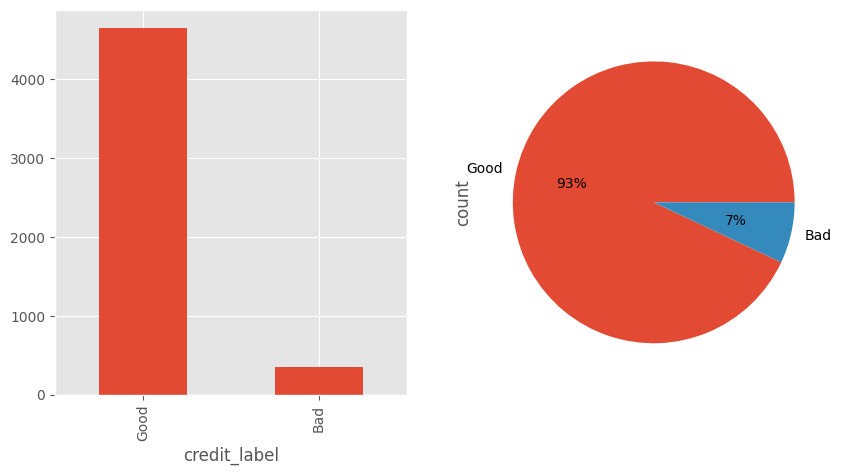

In [17]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
label_df['credit_label'].value_counts().plot(kind='bar',ax=axs[0])
label_df['credit_label'].value_counts().plot(kind='pie', autopct='%.0f%%', ax=axs[1])
plt.show()

### 1.2 Examine Numercial Features

Mình sẽ lấy các numerical features ra

In [18]:
# Get numerical feature columns
numfeat_cols = feature_df.select_dtypes(include=np.number).columns.tolist()
len(numfeat_cols),numfeat_cols

(29,
 ['membership_lifespan',
  'num_day_since_last_active',
  'num_active_last_7d',
  'num_active_last_14d',
  'num_active_last_30d',
  'most_active_hour',
  'num_apply_lending',
  'total_amount_spent',
  'total_amount_spent_last_30d',
  'total_amount_spent_last_60d',
  'total_amount_spent_last_90d',
  'total_amount_spent_last_180d',
  'total_amount_spent_last_365d',
  'total_tax_amount_spent',
  'total_fee_amount_spent',
  'num_completed_txn',
  'num_canceled_txn',
  'num_reject_txn',
  'pct_reject2total_txn',
  'num_refunded_txn',
  'prob_abuse_promotion',
  'num_used_promotion',
  'prob_abnormal_activity',
  'num_select_promotion',
  'num_interest_products',
  'income_spending_ratio',
  'total_tax_amount',
  'monthly_bill_amount',
  'total_annual_bill_amount'])

Xem các thông tin cơ bản

In [19]:
feature_df.describe()

,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,most_active_hour,num_apply_lending,total_amount_spent,total_amount_spent_last_30d,total_amount_spent_last_60d,...,num_refunded_txn,prob_abuse_promotion,num_used_promotion,prob_abnormal_activity,num_select_promotion,num_interest_products,income_spending_ratio,total_tax_amount,monthly_bill_amount,total_annual_bill_amount
count,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,...,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03
mean,534.231200,181.049400,147.46780,300.95420,502.009200,9.62300,10.478000,5.015635e+09,4.980806e+08,5.012800e+08,...,7.96400,0.498788,51.157200,0.501236,508.212800,24.974400,0.504803,5.051454e+06,2.493800e+07,2.987671e+08
std,238.328114,105.929884,86.54043,172.55515,287.800378,9.17604,5.797675,2.920062e+09,2.889399e+08,2.871752e+08,...,4.29022,0.286694,28.654862,0.293652,288.843031,14.796889,0.288393,2.856696e+06,1.446380e+07,1.723207e+08
min,3.000000,1.000000,1.00000,1.00000,1.000000,0.00000,1.000000,1.192000e+06,7.000000e+04,3.260000e+05,...,1.00000,0.000215,1.000000,0.010000,1.000000,0.000000,0.000122,1.000000e+05,1.000000e+05,1.800000e+05
25%,349.000000,89.000000,73.00000,152.00000,252.000000,2.00000,5.000000,2.472822e+09,2.514065e+08,2.531015e+08,...,4.00000,0.250678,27.000000,0.240000,260.750000,12.000000,0.255888,2.569750e+06,1.257500e+07,1.485510e+08
50%,560.500000,179.000000,147.50000,300.00000,503.000000,4.00000,10.000000,5.038122e+09,4.948505e+08,5.045690e+08,...,8.00000,0.501567,51.000000,0.510000,511.000000,25.000000,0.510377,5.114500e+06,2.500000e+07,2.998620e+08
75%,742.000000,274.000000,222.00000,450.00000,748.000000,21.00000,16.000000,7.591250e+09,7.499222e+08,7.507168e+08,...,12.00000,0.746402,76.000000,0.750000,762.000000,38.000000,0.754071,7.552250e+06,3.750000e+07,4.499310e+08
max,899.000000,365.000000,300.00000,600.00000,1000.000000,23.00000,20.000000,9.996418e+09,9.997740e+08,9.996550e+08,...,15.00000,0.999841,99.000000,0.990000,999.000000,50.000000,0.999672,1.000000e+07,4.990000e+07,5.999160e+08


Nhiều feature có range dao động rất lớn ví dụ monthly_income, total_property_value, monthly_bill_amount...

Chúng ta sẽ cần standardize chúng lại nếu ko sẽ xảy ra vấn đề một số **feature bị overweighted** trong quá trình training

Chúng ta sẽ ghi nhớ điểm này để phần feature pipeline (2.2.1) sẽ nói tiếp

Chúng ta sẽ làm kiểm tra feature correlation, đính kèm label vào để xem xu hướng các feature và mối tương quan của chúng

In [20]:
interest_df = feature_df.copy()
interest_df['credit_label_bin'] = label_df['credit_label_bin']

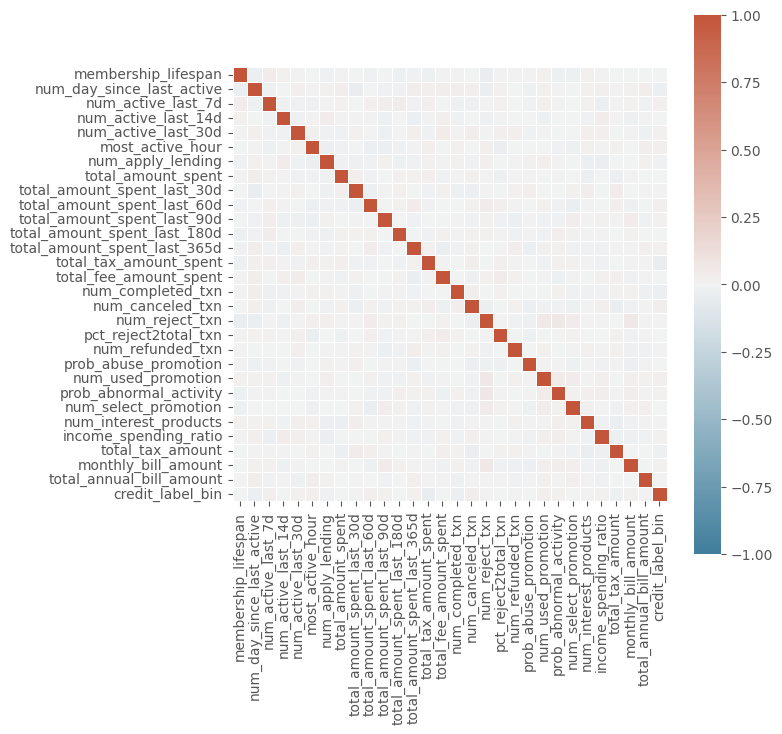

In [21]:
plt.figure(figsize=(7,7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr_maxtrix = interest_df[numfeat_cols + ['credit_label_bin']].corr()
sns.heatmap(corr_maxtrix, cmap=cmap, center=0, square=True, linewidths=.5, vmin=-1, vmax=1, fmt=".2f")
plt.show()

Rõ ràng thì có 1 cụm feature có mối tương quan cao ở góc trái. Những feature có tương quan cao sẽ có khả năng đi cùng nhau về mặt tác động của nó với label (nghĩa là nếu 1 trong 3 feature có tác động mạnh vào label thì cả 3 sẽ tác động theo và ngược lại)


Còn đối với label thì hầu như ko có feature nào có tương quan với nó cả

### 1.3 Examine Category Features

Chúng ta sẽ kiểm tra category feature

In [22]:
# Get category feature columns + most_active_hour
catfeat_cols = feature_df.select_dtypes(include=[object, bool]).columns.tolist() 
len(catfeat_cols), catfeat_cols

(11,
 ['signup_in_latenight',
  'top_rejected_reason',
  'top_refunded_reason',
  'top_payment_method',
  'top_payment_channel',
  'is_ordering_shipping_address_same',
  'income_stability',
  'income_source',
  'annually_income_segment',
  'top_property_type',
  'in_debt'])

Check unique values of each category features

In [23]:
feature_df[catfeat_cols].nunique()

signup_in_latenight                  2
top_rejected_reason                  7
top_refunded_reason                  8
top_payment_method                   5
top_payment_channel                  5
is_ordering_shipping_address_same    2
income_stability                     4
income_source                        6
annually_income_segment              4
top_property_type                    4
in_debt                              2
dtype: int64

Bạn hãy để ý nếu các category feature nào có quá nhiều unique value thì sẽ gây ra 1 tình trạng gọi là **sparse matrix**

Để hiểu rõ hơn thì các category feature khi chuyển thành feature xài được thì được encode lại thành dạng One-Hot Vector. 

**One Hot Vector là gì?**

Là chuyển đổi từ 1 category columns thành k columns (với k là số lượng unique value trong column đó)

- Ví column gender có 3 giá trị [Nam, Nữ, Khác]. Khi đó one-hot-vector của gender là [0, 0, 1] với 1 sẽ là vị trí của giá trị đó

- Giả sử customer_id 1 là Nam thì giá trị one-hot-encoder của gender là [1, 0, 0] ứng với  [Nam, Nữ, Khác]

- Điều này cũng đồng nghĩa nếu giả sử cột city có 62 tỉnh thành thì sẽ là 1 vector 62 chiều. 

- Và khi nói đến city_matrix của toàn data sẽ là 1 vector toàn số 0 và rất ít số 1, gọi là **sparse matrix**

  
> Đối với trường hợp, sau này gender có thêm giá trị null thì One-Hot-Encoder (thư viện để chuyển đổi One-Hot-Vector của sklearn) sẽ treat null như là 1 giá trị riêng. Tương đương là vector 4 chiều [Nam, Nữ, Khác, null]

> Boolean: cũng là category feature nhé, và bạn cần cẩn thận với feature này. 

> most_active_hour tuy là dạng số nhưng về mặt data logic thì nó là category features.

## 2. Data Pipeline

### 2.1 Train/Test selection

Đầu tiên chúng ta sẽ xem label theo tháng ra sao

- Đa phần label ở các tháng đều tương đồng, duy nhất có rất nhiều label ở tháng 2022-12

In [24]:
label_df[label_df['disbursement_date'].notnull()]['credit_label'].value_counts(normalize=False)

credit_label
Good    4650
Bad       33
Name: count, dtype: int64

<Axes: xlabel='disbursement_date'>

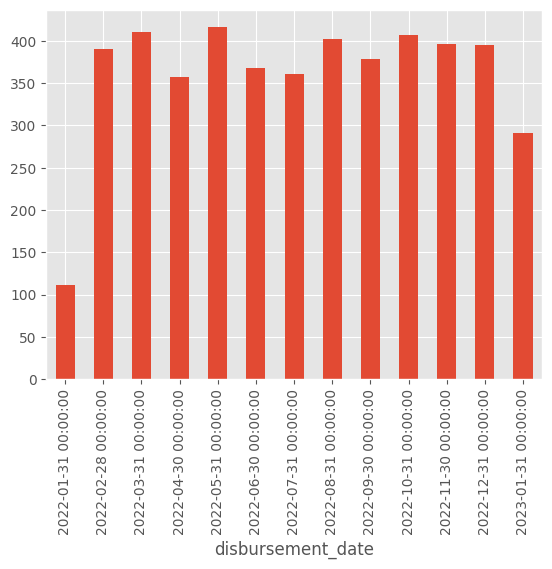

In [25]:
label_df.set_index('disbursement_date')['customer_id'].resample('1M').count().plot(kind='bar')

<Axes: xlabel='disbursement_date'>

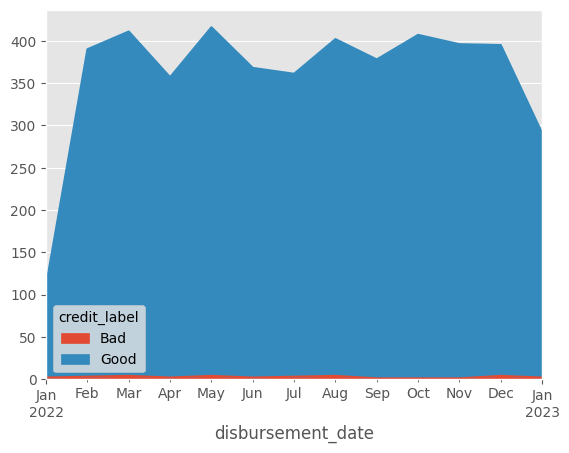

In [26]:
grouper = label_df.set_index('disbursement_date').groupby([pd.Grouper(freq='1M'), 'credit_label'])['customer_id'].nunique()
grouper = grouper.reset_index().pivot_table(index='disbursement_date', columns='credit_label', values='customer_id')
grouper.sum(axis=0)
grouper.plot(kind='area')

In [27]:
# Split theo đề bài, bạn lấy mốc 2022-10 trở về trước làm train và data sau 2022-10 là test

# selected_date = '2022-11-01'
# train_data = label_df[label_df['disbursement_date'] < selected_date]
# test_data = label_df[label_df['disbursement_date'] >= selected_date]

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(label_df, test_size=0.3)

# No sample is ignored
train_data.shape, test_data.shape

((3500, 11), (1500, 11))

Train and test dataset size is 70:30

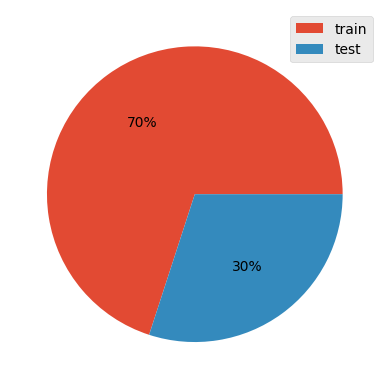

In [28]:
plt.figure()
plt.pie(x=[train_data.shape[0], test_data.shape[0]], autopct='%.0f%%')
plt.legend(['train','test'])
plt.show()

### 2.2 Feature Transformation

Chúng ta sẽ đi qua phần feature transformation

#### 2.2.1 Feature Pipeline

In [29]:
# all feat cols
feat_cols = numfeat_cols + catfeat_cols
len(feat_cols), feat_cols

(40,
 ['membership_lifespan',
  'num_day_since_last_active',
  'num_active_last_7d',
  'num_active_last_14d',
  'num_active_last_30d',
  'most_active_hour',
  'num_apply_lending',
  'total_amount_spent',
  'total_amount_spent_last_30d',
  'total_amount_spent_last_60d',
  'total_amount_spent_last_90d',
  'total_amount_spent_last_180d',
  'total_amount_spent_last_365d',
  'total_tax_amount_spent',
  'total_fee_amount_spent',
  'num_completed_txn',
  'num_canceled_txn',
  'num_reject_txn',
  'pct_reject2total_txn',
  'num_refunded_txn',
  'prob_abuse_promotion',
  'num_used_promotion',
  'prob_abnormal_activity',
  'num_select_promotion',
  'num_interest_products',
  'income_spending_ratio',
  'total_tax_amount',
  'monthly_bill_amount',
  'total_annual_bill_amount',
  'signup_in_latenight',
  'top_rejected_reason',
  'top_refunded_reason',
  'top_payment_method',
  'top_payment_channel',
  'is_ordering_shipping_address_same',
  'income_stability',
  'income_source',
  'annually_income_se

Để có thể đối phó với các giá trị null và các numerical feature mà phân phối nó quá rộng, chúng ta sẽ sử dụng quick-solve

- SimpleImputer: để fill các giá trị null bằng giá trị median/mean/min/max/q25...

- StandardScaler: để standardize các numerical feature mà range nó quá rộng


Mình sử dụng Pipeline của sklearn để thiết kế cái khung trước

In [30]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

Với category features, như mình đã nói ở trên, bạn sử dụng OneHotEncoder và handle những giá trị chưa từng biết bằng cách treat những giá trị đó là vector zeros

Tham khảo thêm: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [31]:
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

Tạo feature pipeline với num và cat, hình vẽ minh họa ở dưới

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numfeat_cols),
        ("cat", categorical_transformer, catfeat_cols),
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['membership_lifespan',
                                  'num_day_since_last_active',
                                  'num_active_last_7d', 'num_active_last_14d',
                                  'num_active_last_30d', 'most_active_hour',
                                  'num_apply_lending', 'total_amount_spent',
                                  'total_amount_spent_last_30d',
                                  'total_amount_...
                                  'monthly_bill_amount',
                                  'total_annual_bill_amount']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['signup_in_latenight', 'top_rejected_reason',
                                  'top_refunded_reason', 'top_payment_method',
                                  'top_payment_channel',
                                  'is_ordering_shipping_address_same',
                                  'income_stability', 'income_source',
                                  'annually_income_segment',
                                  'top_property_type', 'in_debt'])])

#### 2.2.2 X,y of train & test

In [33]:
X_train, y_train = feature_df[feat_cols].iloc[train_data.index], label_df['credit_label_bin'].iloc[train_data.index]
X_train.shape, y_train.shape

((3500, 40), (3500,))

In [34]:
X_test, y_test = feature_df[feat_cols].iloc[test_data.index], label_df['credit_label_bin'].iloc[test_data.index]
X_test.shape, y_test.shape

((1500, 40), (1500,))

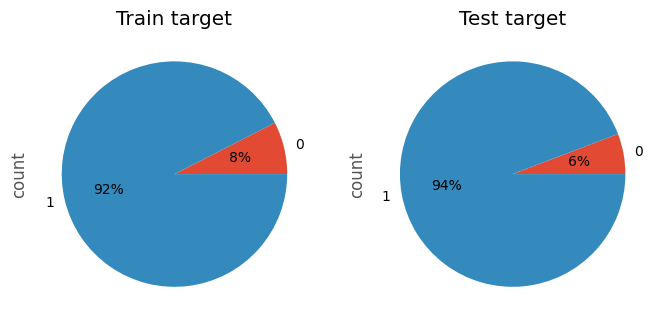

In [35]:
# Check label distribution of each dataset
fig, axs = plt.subplots(1,2, figsize=(8,5))
y_train.value_counts().sort_index().plot(kind='pie', autopct='%.0f%%',ax=axs[0], title='Train target',)
y_test.value_counts().sort_index().plot(kind='pie', autopct='%.0f%%',ax=axs[1], title='Test target')
plt.show()

#### 2.2.2 Feature Transform

In [36]:
# fit, transform, fit_transform

In [37]:
# fit columns-transformer với feature 
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['membership_lifespan',
                                  'num_day_since_last_active',
                                  'num_active_last_7d', 'num_active_last_14d',
                                  'num_active_last_30d', 'most_active_hour',
                                  'num_apply_lending', 'total_amount_spent',
                                  'total_amount_spent_last_30d',
                                  'total_amount_...
                                  'monthly_bill_amount',
                                  'total_annual_bill_amount']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['signup_in_latenight', 'top_rejected_reason',
                                  'top_refunded_reason', 'top_payment_method',
                                  'top_payment_channel',
                                  'is_ordering_shipping_address_same',
                                  'income_stability', 'income_source',
                                  'annually_income_segment',
                                  'top_property_type', 'in_debt'])])

Chuyển đổi data ban đầu sang thành transformed data

In [38]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Get new transformed feature names

In [39]:
transfeat_cols = preprocessor.get_feature_names_out()
transfeat_cols.shape, transfeat_cols

((78,),
 array(['num__membership_lifespan', 'num__num_day_since_last_active',
        'num__num_active_last_7d', 'num__num_active_last_14d',
        'num__num_active_last_30d', 'num__most_active_hour',
        'num__num_apply_lending', 'num__total_amount_spent',
        'num__total_amount_spent_last_30d',
        'num__total_amount_spent_last_60d',
        'num__total_amount_spent_last_90d',
        'num__total_amount_spent_last_180d',
        'num__total_amount_spent_last_365d', 'num__total_tax_amount_spent',
        'num__total_fee_amount_spent', 'num__num_completed_txn',
        'num__num_canceled_txn', 'num__num_reject_txn',
        'num__pct_reject2total_txn', 'num__num_refunded_txn',
        'num__prob_abuse_promotion', 'num__num_used_promotion',
        'num__prob_abnormal_activity', 'num__num_select_promotion',
        'num__num_interest_products', 'num__income_spending_ratio',
        'num__total_tax_amount', 'num__monthly_bill_amount',
        'num__total_annual_bill_amount',

Các bạn sẽ thấy có tận 227 columns so với 59 columns ban đầu, lý do là OneHotEncoder đã sinh ra rất nhiều column mới

- Prefix **num__** for numerical features (which is exactly 37 cols)

- Prefix **cat__** for category features following with suffix **_{value}** of each unique value of each feature

  - suffix **_nan** indicate that OneHotEncoder treat null value as a separate value of that category feature
  
  - example: cat__gender_Khác là 1 vector one-hot thuộc gender có giá trị *Khác*

In [40]:
X_train_transformed.shape, X_test_transformed.shape

((3500, 78), (1500, 78))

The number of origin features is 59 and now transformed features is 227

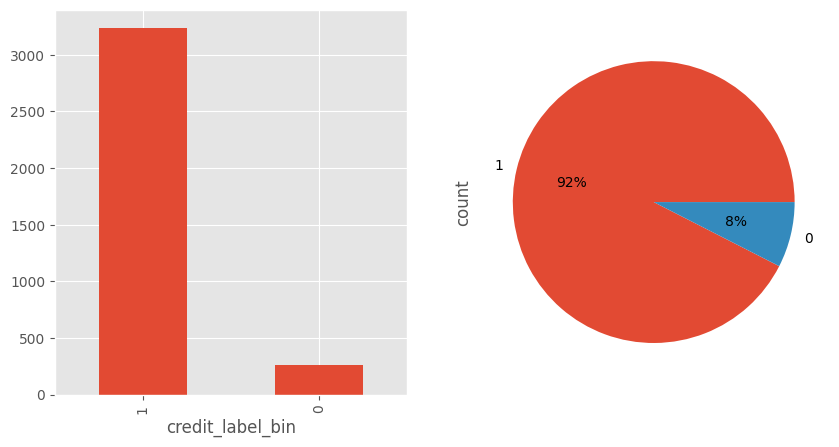

In [41]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
y_train.value_counts().plot(kind='bar',ax=axs[0])
y_train.value_counts().plot(kind='pie', autopct='%.0f%%', ax=axs[1])
plt.show()

In [42]:
# from imblearn.combine import SMOTEENN, SMOTETomek

# smote_enn = SMOTEENN()
# X_train_transformed, y_train = smote_enn.fit_resample(X_train_transformed, y_train)

In [43]:
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

sampler = RandomUnderSampler(sampling_strategy=0.45)
X_train_transformed, y_train = sampler.fit_resample(X_train_transformed, y_train)

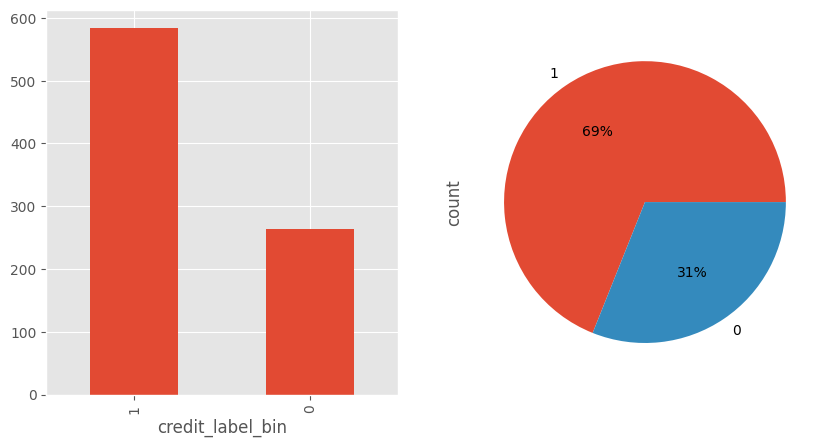

In [44]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
y_train.value_counts().plot(kind='bar',ax=axs[0])
y_train.value_counts().plot(kind='pie', autopct='%.0f%%', ax=axs[1])
plt.show()

### 2.2 Train Pipeline

Bài vừa rồi chúng ta đã làm quen với Decision Tree và Random Forest Classifier.

Lần này chúng ta sẽ làm quen với 1 vài mô hình khác và so sánh chúng với nhau

#### K-Nearest Neighbors (KNeighbors):
**Giới thiệu:** K-Nearest Neighbors (KNeighbors) là một thuật toán dự đoán dựa trên việc xác định lớp của một điểm dữ liệu mới bằng cách so sánh với k điểm dữ liệu gần nhất trong tập huấn luyện, dựa trên khoảng cách Euclidean hoặc khoảng cách khác.

**Ưu điểm:**
- Đơn giản để triển khai và hiểu.
- Khả năng làm việc tốt với dữ liệu có chiều dữ liệu thấp.
- Khả năng mở rộng đối với số lượng lớn điểm dữ liệu.

**Nhược điểm:**
- Yêu cầu chọn kết quả tốt cho k (số lượng điểm lân cận).
- Nhạy cảm với nhiễu và dữ liệu bất thường.
- Hiệu suất yếu khi dữ liệu có chiều dữ liệu cao.

#### Logistic Regression:
**Giới thiệu:** Logistic Regression là một thuật toán phân loại dựa trên hồi quy, nó ước tính xác suất của một điểm dữ liệu thuộc lớp tích cực (positive class).

**Ưu điểm:**
- Dễ dàng hiểu và giải thích.
- Phù hợp cho các bài toán có dữ liệu tương đối đơn giản và tách biệt tuyến tính.

**Nhược điểm:**
- Khả năng xử lý dữ liệu phức tạp và tách biệt phi tuyến tính kém.
- Dễ bị ảnh hưởng bởi nhiễu và dữ liệu ngoại lai.
- Có thể cần một số công việc tiền xử lý dữ liệu để phù hợp.

#### XGBoost (Extreme Gradient Boosting):
**Giới thiệu:** XGBoost là một thuật toán học máy tập trung vào cây quyết định (decision trees) được kết hợp lại thông qua phương pháp boosting. Nó có khả năng xử lý cả bài toán phân loại và hồi quy.

**Ưu điểm:**
- Hiệu suất cao và khả năng tìm ra các mô hình phức tạp.
- Xử lý tốt các dạng dữ liệu phức tạp và phi tuyến tính.
- Có khả năng xử lý dữ liệu thiếu và dữ liệu ngoại lai.

**Nhược điểm:**
- Cần cấu hình tốt để tránh overfitting.
- Đòi hỏi nhiều tài nguyên tính toán so với một số thuật toán khác.
- Dễ bị overfitting nếu không kiểm soát tốt các tham số. 

#### 2.2.1 Model selection

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

In [46]:
models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Xgboost', XGBClassifier()),
]

In [47]:
# Dict to store result of each model
results = {i[0]:{} for i in models}
results

{'KNeighbors': {},
 'Logistic Regression': {},
 'Decision Tree': {},
 'Random Forest': {},
 'Xgboost': {}}

#### 2.2.2 Model training

In [48]:
from datetime import datetime

In [49]:
for name, model in models:
    start = datetime.now()
    model.fit(X_train_transformed, y_train)
    print(name, datetime.now() - start)
    results[name]['y_train_pred'] = model.predict(X_train_transformed)
    results[name]['y_train_prob'] = model.predict_proba(X_train_transformed)
    results[name]['y_test_pred'] = model.predict(X_test_transformed)
    results[name]['y_test_prob'] = model.predict_proba(X_test_transformed)

KNeighbors 0:00:00.001191
Logistic Regression 0:00:00.007153
Decision Tree 0:00:00.022165
Random Forest 0:00:00.226008
Xgboost 0:00:00.133470


## 3. Evaluation

Ở bài trước chúng ta đã được học Precision và Recall và hiểu tại sao Accuracy ko hữu hiệu trong bài toán imbalanced dataset

In [50]:
from sklearn import metrics

In [51]:
metric_records = {i[0]:{} for i in models}
metric_records

{'KNeighbors': {},
 'Logistic Regression': {},
 'Decision Tree': {},
 'Random Forest': {},
 'Xgboost': {}}

In [52]:
def evalute_performance(name,model):
    def evaluate_dataset(dataset):
        print(f'Evaluate {dataset} set')
        
        y_pred = results[name][f'y_{dataset}_pred']
        y_prob = results[name][f'y_{dataset}_prob']
        y_score = y_prob[:,1] # prob of positive label
        
        if dataset == 'train':
            y_true = y_train
        else:
            y_true = y_test
        
        # AUC
        fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label=1)
        auc_score = metrics.auc(fpr, tpr)
        print('\tAUC', auc_score)

        # ROC
        fig,axs=plt.subplots(1,3,figsize=(15,5))
        metrics.RocCurveDisplay.from_predictions(y_true, y_score, name=name, plot_chance_level=True,ax=axs[0],)
        axs[0].title.set_text('ROC binary classifibcation')

        # PRC
        metrics.PrecisionRecallDisplay.from_predictions(y_true, y_score, name=name, plot_chance_level=True, ax=axs[1],)
        axs[1].set_title("Precision-Recall curve")
        axs[1].legend(loc='best')

        # PDF
        sns.histplot(y_prob,ax=axs[2], kde=True, stat='density', common_norm=True)
        axs[2].set_title("Probility Distribution of Label")
        plt.show()

        # classification matrix
        print('Classification Report with default threshold=0.5')
        print(metrics.classification_report(y_true, y_pred))
        p,r,f, _ = metrics.precision_recall_fscore_support(y_true, y_pred, average='binary', )
        
        metric_records[name][f'{dataset}_auc'] = auc_score
        metric_records[name][f'{dataset}_precision'] = p
        metric_records[name][f'{dataset}_recall'] = r
        metric_records[name][f'{dataset}_f1'] = f
        
    print('======================')
    print(f'Performance of {name}\n')
    evaluate_dataset('train')
    evaluate_dataset('test')
    print('\n\n')

### 3.1 KNeighbors evaluation

Performance of KNeighbors

Evaluate train set
	AUC 0.7365910984947133


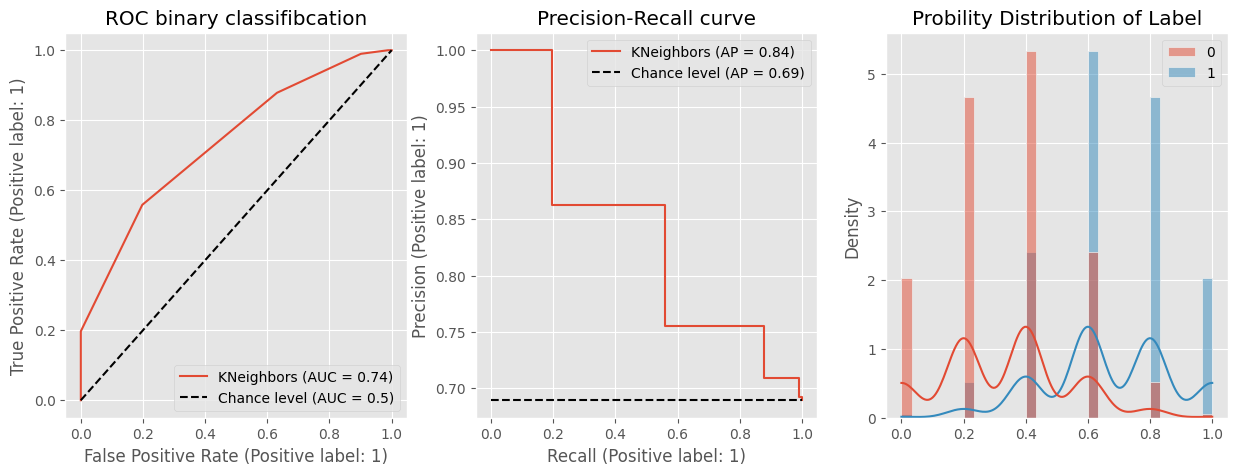

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.58      0.37      0.45       263
           1       0.76      0.88      0.81       584

    accuracy                           0.72       847
   macro avg       0.67      0.62      0.63       847
weighted avg       0.70      0.72      0.70       847

Evaluate test set
	AUC 0.5078702686873123


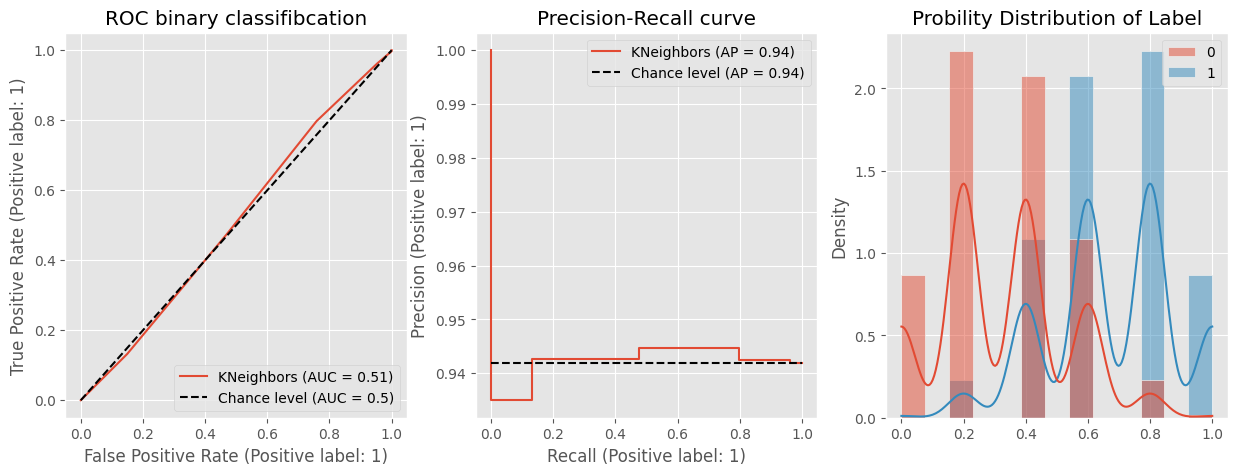

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.07      0.24      0.11        87
           1       0.94      0.80      0.86      1413

    accuracy                           0.77      1500
   macro avg       0.51      0.52      0.49      1500
weighted avg       0.89      0.77      0.82      1500






In [53]:
name, model = models[0]
evalute_performance(name, model)

### 3.2 Logistic Regression evaluation

Performance of Logistic Regression

Evaluate train set
	AUC 0.6673719985415907


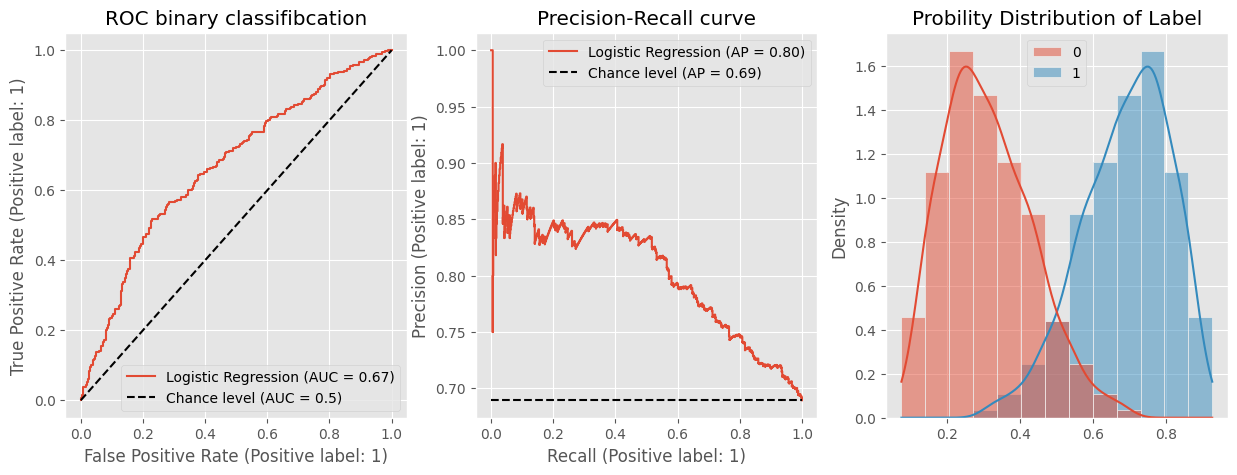

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.54      0.13      0.21       263
           1       0.71      0.95      0.81       584

    accuracy                           0.70       847
   macro avg       0.62      0.54      0.51       847
weighted avg       0.66      0.70      0.63       847

Evaluate test set
	AUC 0.48850981444875585


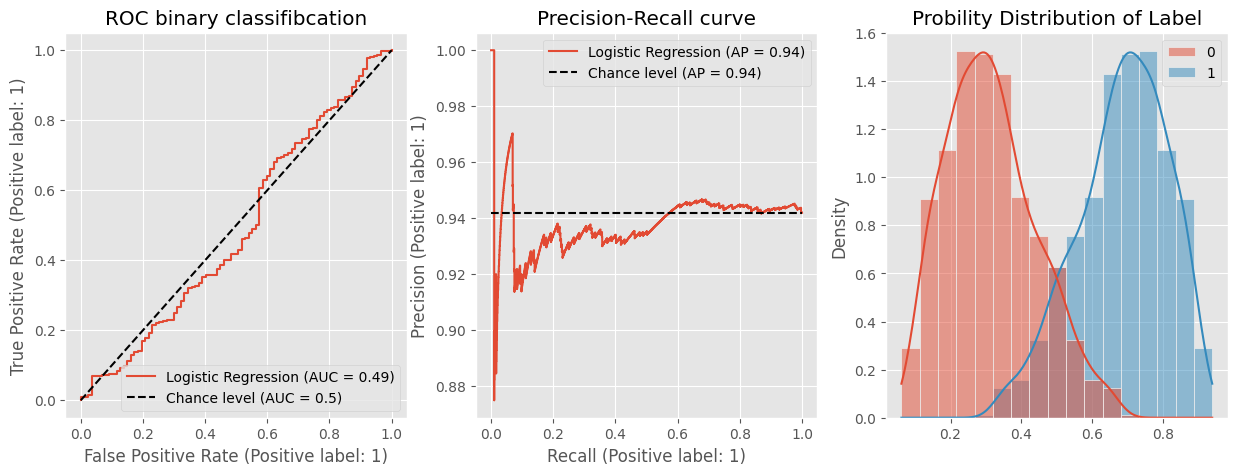

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.07      0.11      0.09        87
           1       0.94      0.91      0.92      1413

    accuracy                           0.86      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.89      0.86      0.88      1500






In [54]:
name, model = models[1]
evalute_performance(name, model)

### 3.3 Decision Tree evaluation

Performance of Decision Tree

Evaluate train set
	AUC 1.0


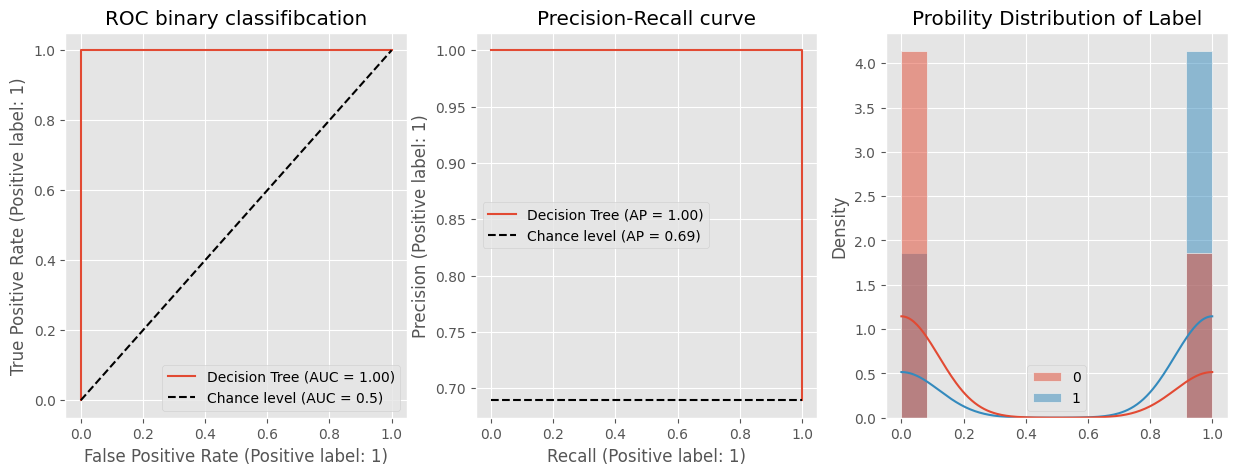

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       584

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847

Evaluate test set
	AUC 0.4844302901627743


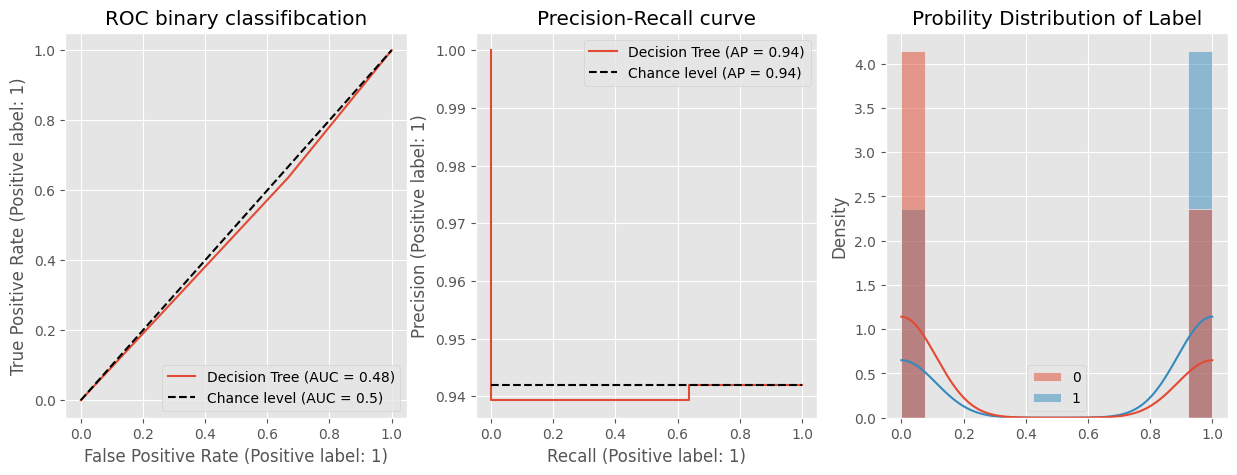

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.05      0.33      0.09        87
           1       0.94      0.64      0.76      1413

    accuracy                           0.62      1500
   macro avg       0.50      0.48      0.43      1500
weighted avg       0.89      0.62      0.72      1500






In [55]:
name, model = models[2]
evalute_performance(name, model)

### 3.4 Random Forest evaluation

Performance of Random Forest

Evaluate train set
	AUC 0.9999999999999999


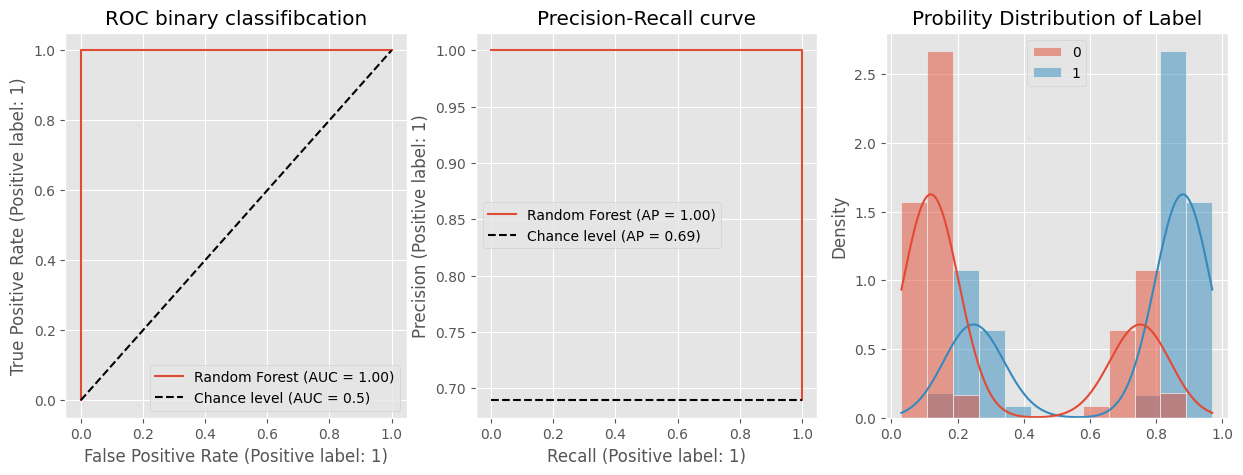

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       584

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847

Evaluate test set
	AUC 0.5145935524806599


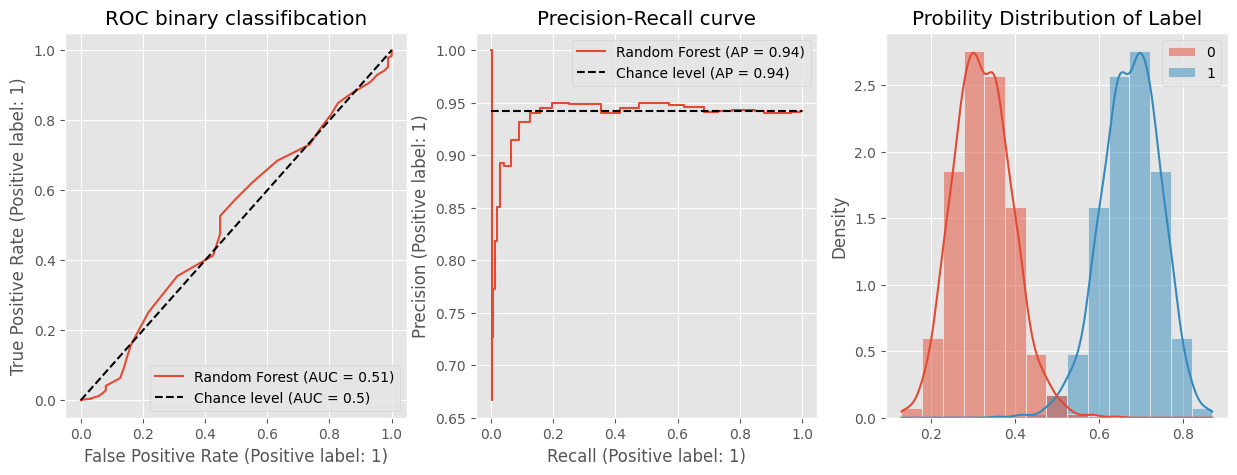

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.94      0.99      0.96      1413

    accuracy                           0.93      1500
   macro avg       0.47      0.49      0.48      1500
weighted avg       0.89      0.93      0.91      1500






In [56]:
name, model = models[3]
evalute_performance(name, model)

### 3.5 XGboost evaluation

Performance of Xgboost

Evaluate train set
	AUC 1.0


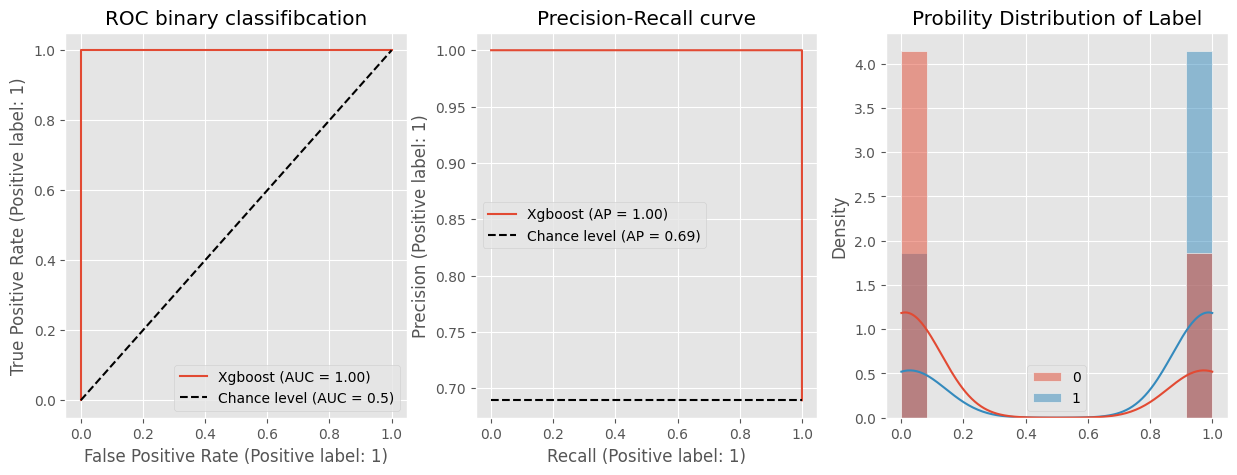

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       1.00      1.00      1.00       584

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847

Evaluate test set
	AUC 0.48785090823307387


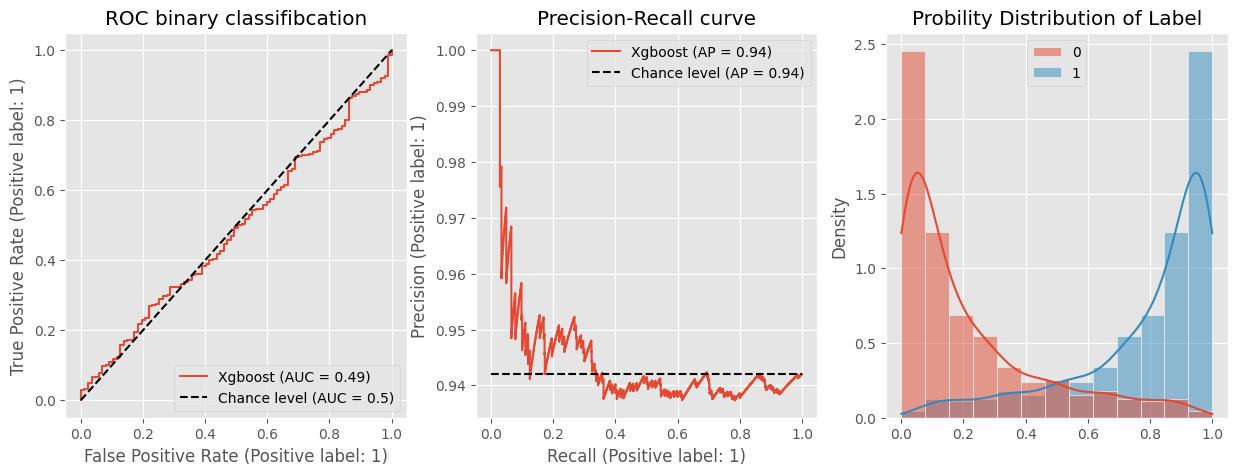

Classification Report with default threshold=0.5
              precision    recall  f1-score   support

           0       0.06      0.13      0.08        87
           1       0.94      0.87      0.90      1413

    accuracy                           0.83      1500
   macro avg       0.50      0.50      0.49      1500
weighted avg       0.89      0.83      0.86      1500






In [57]:
name, model = models[4]
evalute_performance(name, model)

### 3.6 Compare Model Performances

In [58]:
# Metric records
record_df = pd.DataFrame(metric_records)
record_df['dataset'] = record_df.index.to_series().apply(lambda x:x.split('_')[0])
record_df['metric'] = record_df.index.to_series().apply(lambda x:x.split('_')[1])
record_df.set_index(['dataset', 'metric'])

KNeighbors  Logistic Regression  Decision Tree   
dataset metric                                                      
train   auc          0.736591             0.667372       1.000000  \
        precision    0.755523             0.708440       1.000000   
        recall       0.878425             0.948630       1.000000   
        f1           0.812352             0.811127       1.000000   
test    auc          0.507870             0.488510       0.484430   
        precision    0.944677             0.943299       0.939331   
        recall       0.797594             0.906582       0.635527   
        f1           0.864927             0.924576       0.758126   

                   Random Forest   Xgboost  
dataset metric                              
train   auc             1.000000  1.000000  
        precision       1.000000  1.000000  
        recall          1.000000  1.000000  
        f1              1.000000  1.000000  
test    auc             0.514594  0.487851  
        precision       0.941256  0.941673  
        recall          0.986553  0.868365  
        f1              0.963372  0.903535

Đối với các bài toán về Fraud Detection thì chúng ta ưu tiên chọn precision ở tập test cao. Trong trường hợp này thì Random Forest đạt được 1 kết quả rất tốt. Thông thường sau khi so sánh xong, chúng ta sẽ xác định 1 metrics và chọn model tối ưu trên metric đó. (trong trường hợp này là Random Forest)

***Nhưng để học thêm những trường hợp khác nhau, chúng ta sẽ giả sử chọn Logistic Regression là model mà chúng ta thấy tối ưu***

In [59]:
name, model = models[1]
name, model

('Logistic Regression', LogisticRegression())

## 4. Thresholding

Thresholding là kỹ thuật để chọn threshold tốt nhất, với bài toán này, chúng ta sẽ trade-off 1 trong 2 lựa chọn sau:

### Higher Precision and Lower Recall

- Khi threshold đặt mức ngưỡng cao để đánh dấu gian lận, nó sẽ đánh dấu các giao dịch là gian lận chỉ khi nó rất chắc chắn về tính gian lận của chúng. Điều này dẫn đến một tỷ lệ cao các giao dịch được đánh dấu là gian lận đúng (true positives) trong số tất cả các giao dịch được đánh dấu là gian lận (bao gồm cả true positives và false positives), nghĩa là chính xác cao. Tuy nhiên, hệ thống có thể bỏ sót một số giao dịch gian lận (false negatives). **An toàn là trên hết**

### Higher Recall and Lower Precision

- Khi threshold đặt mức ngưỡng thấp, nó có khả năng phát hiện nhiều giao dịch gian lận, bao gồm cả những giao dịch có khả năng là gian lận nhỏ. Model có khả năng phát hiện được nhiều giao dịch gian lận, giảm nguy cơ bỏ sót giao dịch gian lận (false negatives). Tuy nhiên, do hệ thống đánh dấu các giao dịch có khả năng là gian lận nhỏ, có thể dẫn đến một số lượng giao dịch không gian lận bị đánh dấu là gian lận sai (false positives). **Thà bắt nhầm còn hơn bỏ sót**

Tuy nhiên bài toán này rất quan trọng việc nhầm lẫn KH tốt thành xấu (false positive) nên chúng ta sẽ ưu tiên giảm false positive xuống thấp nhất có thể hay là chọn High Precision và Lower Recall xuống

In [60]:
y_pred = results[name]['y_test_pred']
y_prob = results[name]['y_test_prob']
y_score = y_prob[:,1]

In [61]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.style.use('ggplot')
    plt.plot(thresholds, precisions[:-1], "b", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g", label="Recall")
    plt.axvline(x = 0.5, color = 'r', label = 'default-threshold',linestyle=':')
    plt.axvline(x = 0.01, color = 'orange', label = '0.01 threshold',linestyle='-.')
    plt.axvline(x = 0.4, color = 'orange', label = '0.4 threshold',linestyle='-.')
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid( which="both", axis="both", color='gray', linestyle='-', linewidth=1)
    plt.show()

In [62]:
precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_score)

Plot sự biến đổi giữa precision và recall theo threshold, hình dưới miêu tả

- Nếu ta tăng threshold thì precision cũng tăng theo và recall giảm và ngược lại

- Mặc định các mô hình chọn threshold là 0.5

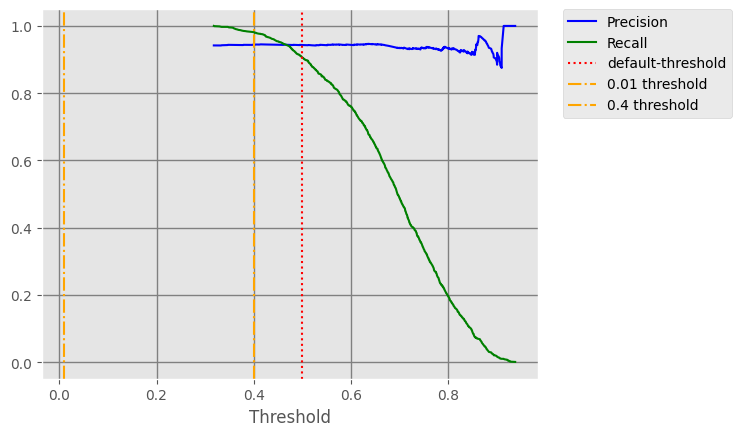

In [63]:
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

Giờ chúng ta sẽ xem xét 2 tình huống threshold là 0.01 và threshold là 0.4

In [64]:
threshold_df = pd.DataFrame({
    'thresholds': [0] + thresholds.tolist(),
    'precisions': precisions, 
    'recalls': recalls, 
})
threshold_df

,thresholds,precisions,recalls
0,0.000000,0.942000,1.000000
1,0.317989,0.941961,0.999292
2,0.319064,0.941923,0.998585
3,0.329475,0.941884,0.997877
4,0.331523,0.941845,0.997169
...,...,...,...
1496,0.926239,1.000000,0.002831
1497,0.927567,1.000000,0.002123
1498,0.927625,1.000000,0.001415
1499,0.929438,1.000000,0.000708


Bảng dưới đây là kết quả của 2 threshold

In [65]:
thresh_1 = 0.01
thresh_2 = 0.4

idx_threshold_1 = (threshold_df['thresholds']<=thresh_1).sum()
idx_threshold_40 = (threshold_df['thresholds']<=thresh_2).sum()
threshold_df.iloc[[idx_threshold_1,idx_threshold_40],:].reset_index(drop=True)

,thresholds,precisions,recalls
0,0.317989,0.941961,0.999292
1,0.400078,0.944142,0.980892


**Hãy xem so sánh kết quả của 2 threshold**

In [66]:
y_pred_thres_1pct = (y_prob[:,1] >= thresh_1).astype(int)
y_pred_thres_40pct = (y_prob[:,1] >= thresh_2).astype(int)

In [67]:
# calculate precision/recall/f1/accuracy with selected threshold
p1 = metrics.precision_score(y_test, y_pred_thres_1pct)
r1 = metrics.recall_score(y_test, y_pred_thres_1pct)
a1 = metrics.accuracy_score(y_test, y_pred_thres_1pct)
f1_1 = metrics.f1_score(y_test, y_pred_thres_1pct)

p2 = metrics.precision_score(y_test, y_pred_thres_40pct)
r2 = metrics.recall_score(y_test, y_pred_thres_40pct)
a2 = metrics.accuracy_score(y_test, y_pred_thres_40pct)
f1_2 = metrics.f1_score(y_test, y_pred_thres_40pct)

In [68]:
cm1 = metrics.confusion_matrix(y_test, y_pred_thres_1pct, labels=[0,1])
cm2 = metrics.confusion_matrix(y_test, y_pred_thres_40pct, labels=[0,1])

In [69]:
tn1, fp1, fn1, tp1 = cm1.ravel()
tn2, fp2, fn2, tp2 = cm2.ravel()

Dưới đây là 1 confusion matrix

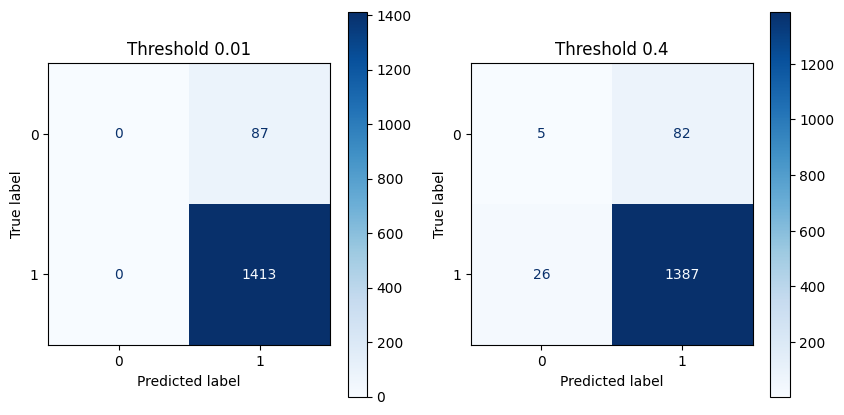

In [70]:
plt.style.use('default')
fig, axs = plt.subplots(1,2, figsize=(10, 5))

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thres_1pct,cmap=plt.cm.Blues,ax=axs[0])
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thres_40pct,cmap=plt.cm.Blues,ax=axs[1])
axs[0].set_title('Threshold 0.01')
axs[1].set_title('Threshold 0.4')
plt.show()

In [71]:
benchmark_df = pd.DataFrame({
    'metric': ['tp', 'fp','tp+fp','precision','recall', 'tp', 'fp','tp+fp','precision','recall'],
    'threshold': [0.01,0.01,0.01,0.01,0.01,0.4,0.4,0.4,0.4,0.4],
    'value': [tp1,fp1,tp1+fp1,p1,r1,tp2,fp2,tp2+fp2,p2,r2]
}).pivot_table(index='threshold', columns='metric',values='value')
benchmark_df['tp'] = benchmark_df['tp'].astype(int)
benchmark_df['fp'] = benchmark_df['fp'].astype(int)
benchmark_df['tp+fp'] = benchmark_df['tp+fp'].astype(int)
benchmark_df[['tp', 'fp', 'tp+fp', 'precision','recall']]

metric,tp,fp,tp+fp,precision,recall
threshold,,,,,
0.01,1413,87,1500,0.94200,1.000000
0.40,1387,82,1469,0.94418,0.981599


Bạn có thể thấy trade-off giữa precision và recall khi chọn threshold, và đây là tiền đề để làm các bài toán scoring sâu hơn.

Việc ưu tiên giảm False Positive là quan trọng trong bài toán này tương đương với việc tăng threshold cao hơn (nhưng cũng đồng thời giảm Recall xuống)

Lúc này chúng ta sẽ giải thích cho business stake-holder cặn kẽ và hiểu xem họ mong muốn gì.

### Special Case

Nếu business stakeholder yêu cầu tối ưu threshold để cả Precision và Recall cùng cao nhất có thể thì đó chính là F1-score, chúng ta có thể làm như sau:

$F_{1} =  \frac{2}{\frac{1}{precision} + \frac{1}{recall}} =2 * (precision * recall) / (precision + recall)$

In [72]:
from sklearn.metrics import f1_score

max_f1, sel_id = 0, None
for i, (p, r, t) in enumerate(zip(precisions, recalls, thresholds)):
    f1 = 2 * (p * r) / (p + r)
    if max_f1 < f1:
        max_f1 = f1
        sel_id = i
print('Maximum F1-score', max_f1)
print('Threshold is\t', thresholds[sel_id])
print('Precision is\t', precisions[sel_id])
print('Recall is \t', recalls[sel_id])

Maximum F1-score 0.9701338825952626
Threshold is	 0.3179891421515498
Precision is	 0.942
Recall is 	 1.0


Trong trường hợp này là 1 case special cho việc tối ưu threshold dựa trên tiêu chí maximum F1-score

In [73]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    print('Optimum F1-score in Random Forest Model')
    plt.style.use('ggplot')
    
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    metrics.RocCurveDisplay.from_predictions(y_test, y_score, name=name, plot_chance_level=True,ax=axs[0])
    axs[0].title.set_text('ROC binary classifibcation')
    
    sel_threshold = thresholds[sel_id]
    y_pred_selthreshold = (y_prob[:,1] >= sel_threshold).astype(int)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_selthreshold).ravel()
    tpr_bestThreshold = tp / (tp + fn) 
    fpr_bestThreshold = fp / (fp + tn)
    axs[0].scatter([fpr_bestThreshold], [tpr_bestThreshold], marker='^', s=100, c='blue')
    axs[0].legend()
    axs[0].set_aspect('equal', adjustable='box')

    axs[1].title.set_text('Precision Recall')
    axs[1].plot(thresholds, precisions[:-1], "b", label="Precision")
    axs[1].plot(thresholds, recalls[:-1], "g", label="Recall")
    axs[1].axvline(x = thresholds[sel_id], color = 'r', label = 'optimum threshold',linestyle='--')
    axs[1].set_xlabel("Threshold")
    axs[1].legend()
    axs[1].grid( which="both", axis="both", color='gray', linestyle='-', linewidth=1)
    axs[1].set_aspect('equal', adjustable='box')
    plt.show()

Optimum F1-score in Random Forest Model


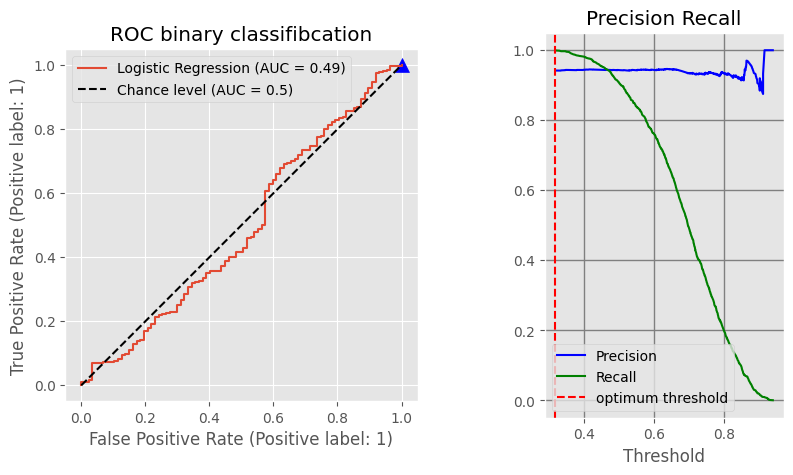

In [74]:
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)

Tiếp theo chúng ta sẽ đi vào phân tích 1 số feature importance 

Chúng ta sẽ quay trở lại với Random Forest model vì nó performance tốt nhất

## 5. Deep analysis

Modeling chỉ là 1 phần nhỏ trong quá trình làm project, quan trọng là bạn vẫn phải làm được báo cáo và phân tích so sánh được feature relation với target (hoặc label) của bài toán

Sau đây sẽ là cách bạn có thể lấy được top những feature quan trọng để đánh giá với target

In [75]:
plt.style.use('ggplot')

In [76]:
name, model = models[3]
name, model

('Random Forest', RandomForestClassifier())

### 5.1 Feature Importance

Get feature importance from the Random Forest Model

Feature Importances of model Random Forest


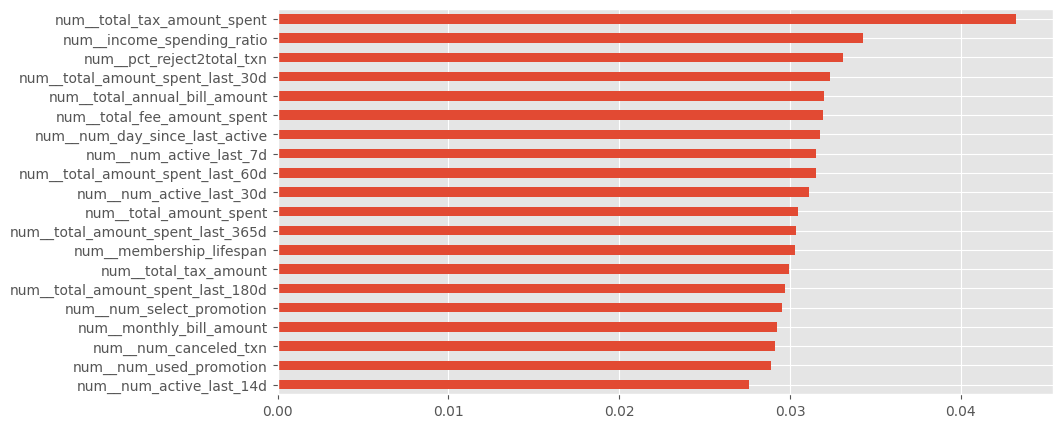

In [77]:
feat_imp_dict = {}

print(f'Feature Importances of model {name}')
featimp_series = pd.Series(model.feature_importances_,index = transfeat_cols)
featimp_series.nlargest(20)[::-1].plot(kind='barh',figsize=(10,5))
plt.show()
feat_imp_dict[name] = featimp_series

Let deep dive into selected features of Random Forest based on feature importance

### 5.2. Analyze Top 20 Feature Importance 

In [78]:
top_transfeats = feat_imp_dict[name].sort_values(ascending=False)[:20]
top_transfeats

num__total_tax_amount_spent          0.043210
num__income_spending_ratio           0.034250
num__pct_reject2total_txn            0.033083
num__total_amount_spent_last_30d     0.032328
num__total_annual_bill_amount        0.032004
num__total_fee_amount_spent          0.031909
num__num_day_since_last_active       0.031740
num__num_active_last_7d              0.031544
num__total_amount_spent_last_60d     0.031492
num__num_active_last_30d             0.031122
num__total_amount_spent              0.030486
num__total_amount_spent_last_365d    0.030360
num__membership_lifespan             0.030318
num__total_tax_amount                0.029938
num__total_amount_spent_last_180d    0.029680
num__num_select_promotion            0.029525
num__monthly_bill_amount             0.029227
num__num_canceled_txn                0.029146
num__num_used_promotion              0.028875
num__num_active_last_14d             0.027594
dtype: float64

Trong top các feature của Random Forest, có 1 số feature category đã bị transform nên bạn cần inverse_transform nó lại để mình có thể phân tích từ original feature

In [79]:
def get_origin_feature_name(x):
    if x.startswith('cat__'):
        res = x.replace('cat__','')
        suffix_idx = res.rfind('_')
        origin_feat_name = res[:suffix_idx]
    else:
        res = x.replace('num__','')
        origin_feat_name = res
    return origin_feat_name

In [80]:
top_originfeats = top_transfeats.index.to_series().apply(lambda x: get_origin_feature_name(x)).tolist()
topfeat_df = top_transfeats.to_frame().reset_index()
topfeat_df['origin_name'] = top_originfeats
topfeat_df = topfeat_df.rename(columns={0:'score'})
topfeat_df['kind'] = topfeat_df['index'].apply(lambda x: 'cat' if x.startswith('cat') else 'num')
topfeat_df

,index,score,origin_name,kind
0,num__total_tax_amount_spent,0.043210,total_tax_amount_spent,num
1,num__income_spending_ratio,0.034250,income_spending_ratio,num
2,num__pct_reject2total_txn,0.033083,pct_reject2total_txn,num
3,num__total_amount_spent_last_30d,0.032328,total_amount_spent_last_30d,num
4,num__total_annual_bill_amount,0.032004,total_annual_bill_amount,num
5,num__total_fee_amount_spent,0.031909,total_fee_amount_spent,num
6,num__num_day_since_last_active,0.031740,num_day_since_last_active,num
7,num__num_active_last_7d,0.031544,num_active_last_7d,num
8,num__total_amount_spent_last_60d,0.031492,total_amount_spent_last_60d,num
9,num__num_active_last_30d,0.031122,num_active_last_30d,num


Có 19 numerical feature và 1 categorical feature quan trọng

In [81]:
topfeat_df[['origin_name', 'kind']].drop_duplicates()['kind'].value_counts()

kind
num    20
Name: count, dtype: int64

In [82]:
# the order of feature importance is kept as same order
aly_col = topfeat_df['origin_name'].unique().tolist()

In [83]:
tmp = topfeat_df[['origin_name', 'kind']].drop_duplicates()
aly_col_kind_map = dict(zip(tmp['origin_name'].tolist(), tmp['kind'].tolist()))

Data Frame chứa thông tin của các feature importance

In [84]:
aly_train, aly_test = train_data[aly_col + ['fraud_label']], test_data[aly_col + ['fraud_label']]
aly_train

KeyError: "None of [Index(['total_tax_amount_spent', 'income_spending_ratio',\n       'pct_reject2total_txn', 'total_amount_spent_last_30d',\n       'total_annual_bill_amount', 'total_fee_amount_spent',\n       'num_day_since_last_active', 'num_active_last_7d',\n       'total_amount_spent_last_60d', 'num_active_last_30d',\n       'total_amount_spent', 'total_amount_spent_last_365d',\n       'membership_lifespan', 'total_tax_amount',\n       'total_amount_spent_last_180d', 'num_select_promotion',\n       'monthly_bill_amount', 'num_canceled_txn', 'num_used_promotion',\n       'num_active_last_14d', 'fraud_label'],\n      dtype='object')] are in the [columns]"

Plot some distribution analysis related to top feature importance

#### 5.2.1 Top Categorical features

Bây giờ chúng ta sẽ plot categorical feature đi cùng với phân phối label của cả train và test set

In [ ]:
aly_cat_col = [i for i in aly_col if aly_col_kind_map[i] == 'cat']
aly_cat_col

In [ ]:
if len(aly_cat_col) > 0:
    fig, axs = plt.subplots(len(aly_cat_col),2, figsize=(10, len(aly_cat_col) * 5))
    for idx, c in enumerate(aly_cat_col):
        if len(aly_cat_col) == 1:
            ax_left, ax_right = axs[0], axs[1]
        else:
            ax_left, ax_right = axs[idx][0], axs[idx][1]
        # Train
        tmp_train = aly_train[[c,'fraud_label']].value_counts(normalize=True).to_frame().reset_index().sort_values(c)
        sns.barplot(data=tmp_train, y=c,hue='fraud_label', x='proportion',ax=ax_left)
        # Test
        tmp_test = aly_test[[c,'fraud_label']].value_counts(normalize=True).to_frame().reset_index().sort_values(c)
        sns.barplot(data=tmp_test, y=c,hue='fraud_label', x='proportion',ax=ax_right, palette='pastel')
    plt.show()

Left figures are train, right figures are test

As above illustration, some comments:

- Chúng ta thấy rằng tỉ lệ fraud của giá trị Không blacklist của train rất khác với với test

Nó cũng ẩn ý rằng tại sao RandomForest fit rất tốt với train mà lại ko đúng hoàn toàn bên test

Bạn biết rằng: model có xu hướng capture tính chất distribution hoặc propotion trên tập train. Điều này có nghĩa nếu tập test có tính chất giống train thì kết quả sẽ giống nhau, nếu tập test có tính chất khác train thì kết quả sẽ khác nhau

**Nếu bạn có câu hỏi rằng**: có nên bỏ các feature và columns đó ra khỏi mô hình ko (giả sử là is_blacklist). Thì đây là 1 trade-off nữa trong modeling:

1. Việc bỏ feature này ra khỏi modeling đồng nghĩa kết quả train và test sẽ xuống (in most cases) nhưng sẽ trade-off được khả năng performance giữa train và test giống nhau => nếu deploy model này thì bạn sẽ có xác suất kết quả trong thực tế ko khác nhiều so với lúc làm modeling (thử nghiệm)

2. Việc giữ lại feature này giúp test performance (in general) sẽ tốt hơn (vì 1 số model như XGboost/CatBoost/LightGBM) trong bản chất fit trong train dataset của nó đã có phần cross-validation. Nếu như feature đó là top-feature importance thì việc bỏ nó ra sẽ 99% performance của test sẽ bị drop => việc giữ lại feature khi deploy có thể sẽ tốt hơn (so với bỏ đi) nhưng kết quả performance của test sẽ khác xa với train

Đây được xem là giới hạn khả năng của data và model. Và chúng ta lại phải lựa chọn trade-off

#### 5.2.2 Top Numerical features

In [ ]:
k = 5
aly_num_col = [i for i in aly_col if aly_col_kind_map[i] =='num'][:k]
aly_num_col

Below is the top feature distribution with its label, left is train set and right is test set

In [ ]:
if len(aly_num_col) > 0:
    fig, axs = plt.subplots(len(aly_num_col),2, figsize=(15, len(aly_num_col) * 7))
    for idx, c in enumerate(aly_num_col):
        if len(aly_num_col) == 1:
            ax_left, ax_right = axs[0], axs[1]
        else:
            ax_left, ax_right = axs[idx][0], axs[idx][1]
        # Train
        sns.histplot(aly_train, x=c, hue="fraud_label",fill=True,ax=axs[idx][0],stat="density", common_norm=False, kde=True)
        # Test
        sns.histplot(aly_test, x=c, hue="fraud_label", fill=True,ax=axs[idx][1], palette='pastel',stat="density", common_norm=False, kde=True)
    plt.show()

Nhìn kỹ vào hình bên trái của num_select_promotion feature:

- Distribution của 0 và 1 (non-fraud & fraud) rất dễ để tách ra 2 lớp, 

- Bên test cũng tương tự vậy, đó là lý do tại sao model chọn feature này làm top vì khả năng phân tách cao

- Tương tư vậy với membership_lifespan bạn hãy tự nhận xét

**Phân tích mối tương quan 2 chiều giữa top 5 biến num**

**Train Dataset**

In [ ]:
sns.pairplot(data=aly_train[aly_num_col[:k] + ['fraud_label']], hue="fraud_label", corner=True)

**Test Dataset**

In [ ]:
sns.pairplot(data=aly_test[aly_num_col[:k] + ['fraud_label']], hue="fraud_label", corner=True)

**Nhìn kỹ hơn về sự tương quan của top 1,2 num feature**

**Train Dataset**

In [ ]:
sns.jointplot(data=aly_train, x=aly_num_col[0], y=aly_num_col[1], hue="fraud_label")

**Test Dataset**

In [ ]:
sns.jointplot(data=aly_test, x=aly_num_col[0], y=aly_num_col[1], hue="fraud_label")

Rõ ràng, ở bên test set ta thấy được pattern của fraud rõ ràng hơn

#### 5.2.3 Mixed Plot

Xem thử mối tương quan giữa top num và cat feature

In [ ]:
sns.swarmplot(data=aly_train, x=aly_num_col[0], y=aly_cat_col[0], hue="fraud_label")

In [ ]:
sns.swarmplot(data=aly_test, x=aly_num_col[0], y=aly_cat_col[0], hue="fraud_label")

Bạn hãy nhận xét 

## 6. Further Analysis

**Modeling technique**
- Hyper-parameters tuning
- Oversampling/Undersampling
- Cross Validation
- Probability Calibration
- Learning Curve

**Feature Importance**
- SHAP value
- PDP plot

**Model Interpretability** 
- Feature Discretization & Binning
- Weight of Evidence (WoE) & Information Value (IV)
- Apply Logistic in Explanation (HW 5.2)
- Plot Decision Boundary

# C. Conclusion

Tổng kết lại, hôm nay chúng ta đã được đi qua sâu hơn vào kỹ thuật modeling nhiều hơn:

- Với numerical feature, bạn cần kiểm tra range của feature và impute cho null value
- Với category feature, bạn cần chuyển đổi thành dạng one-hot-vector
- Nắm rõ cách transform feature và cẩn thận với chúng
- Biết thêm được 1 số model khác như KNeighbors, Logistic Regression và XGBoost
- Hiểu business metrics và cách so sánh model performance
- Cách căn chỉnh threshold để tối ưu bài toán
- Cách chọn top k feature importance và phân tích ngược lại để tìm ra được hidden pattern